# Problem: Using Clustering techniques to cluster Customer Personality 
 Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

# Auther : Fatema Samir 
# Date : 20 /4/2022



# Data Set From kaggle [Customer Personality Analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.


In [2]:
Data = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep="\t")


In [3]:
Data.shape

(2240, 29)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
Data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
Data.describe().T # getting the statistical summery of the dataset

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


# **Data Preprocessing**

```
1- cleaning the Data
2- Feature Engineering
3- transforming the Data
4- Apply K-Means before PCA
5- Dimension reduction using( PCA )
6- Apply Clustering Methods and Select the better 
```




# Data Cleaning

In [7]:
# Check missing Values
Data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
# fill null Values in incom col by meadian
# Data['Income'].fillna(Data['Income'].median(), inplace = True)
Data.dropna( inplace = True)

In [9]:
Data.isna().sum() # just check missing data 

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [10]:
# check if we have dublicate
Data.duplicated().sum()

0

In [11]:
print(f"{Data['Z_CostContact'].unique()}")
print(f"{Data['Z_Revenue'].unique()}")

[3]
[11]


In [12]:
#drop un-needed columns
Data= Data.drop(["ID","Z_CostContact", "Z_Revenue"], axis=1)

In [13]:
# the column Dt_Customer is not parsed as datetime. let's fix that first
Data["Dt_Customer"] = pd.to_datetime(Data['Dt_Customer'])

In [14]:
print("the oldest customer's enrollment date is ", min(Data["Dt_Customer"]))
print("the most recent customer's enrollment date in the record is", max(Data["Dt_Customer"]))
fig = px.histogram(Data, x ='Dt_Customer')
fig.show()

the oldest customer's enrollment date is  2012-01-08 00:00:00
the most recent customer's enrollment date in the record is 2014-12-06 00:00:00


# Feature Engineering

In [15]:
#finding number of days since person became a customer
from datetime import datetime
Data["Customer_For"]= (datetime.now()-Data["Dt_Customer"]).dt.days

In [16]:
# Extract the age of a customers from "year_birth" feature
Data["Age"] = 2022 - Data["Year_Birth"]

In [17]:
# sum the Amount spent on Products in last 2 years
Data["Spent_2Y"] = Data["MntWines"]+ Data["MntFruits"]+ Data["MntMeatProducts"]+ Data["MntFishProducts"]+ Data["MntSweetProducts"]+ Data["MntGoldProds"]

In [18]:
#finding total number of purchases of customer
Data["Purchases_total"]= Data["NumDealsPurchases"] + Data["NumWebPurchases"] + Data["NumCatalogPurchases"] + Data["NumStorePurchases"]

In [19]:
# create feature "Children" to indicate the total number of children in the house
Data["Children"]= Data["Kidhome"] + Data["Teenhome"]

In [20]:
Data["Is_parent"] = np.where(Data["Children"] >=1 , 1, 0)

In [21]:
print("Education Values: ", Data["Education"].unique())
print("Marital_Status Values:", Data["Marital_Status"].unique())

Education Values:  ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [22]:

status= {"YOLO": "Single", "Absurd": "Single", "Alone": "Single", "Widow": "Single", "Divorced": "Single", "Together": "partner", "Married": "partner"}
Data["Marital_Status"]= Data["Marital_Status"].replace(status)

print("Marital_Status Values:", Data["Marital_Status"].unique())

Marital_Status Values: ['Single' 'partner']


In [23]:
# dropping un-needed columns
Data= Data.drop(["Year_Birth","Dt_Customer","Kidhome","Teenhome"],axis=1)

# Delete Outliers

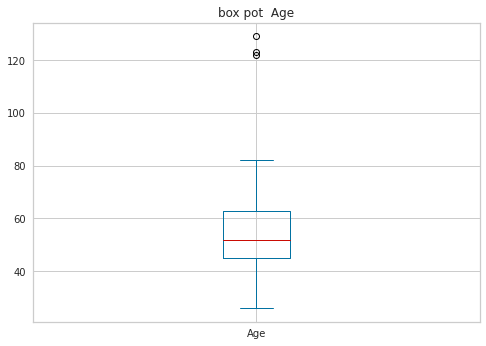

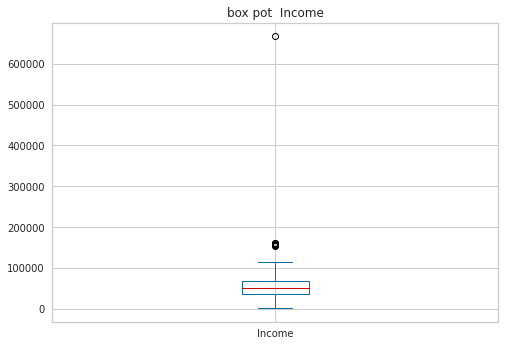

In [24]:
#examine the boxplots of different features
features= ["Age", "Income"]

for col in features:
  Data[col].plot(kind='box',  grid=True)  
  plt.title("box pot  "+ col)
  plt.show()

In [25]:
Data = Data[(Data["Age"]<100)]
Data = Data[(Data["Income"]<600000)]

# Data VisuliZation

<function matplotlib.pyplot.show(close=None, block=None)>

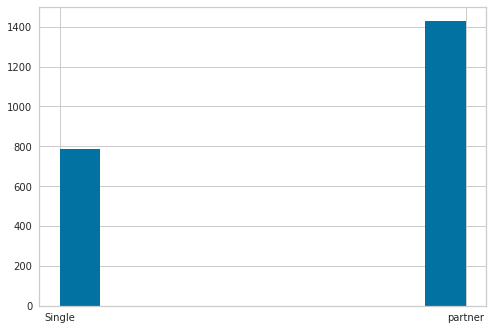

In [26]:
plt.hist(Data['Marital_Status'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

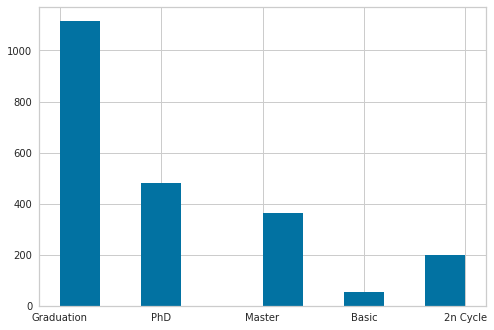

In [27]:
plt.hist(Data['Education'])
plt.show

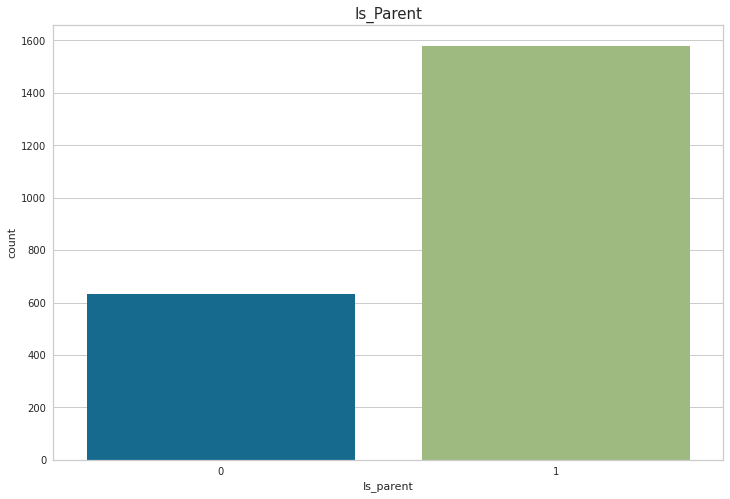

In [28]:
plt.figure(figsize=(12, 8))
sns.countplot(Data["Is_parent"])
plt.title("Is_Parent", size=15)
plt.show()

In [29]:
# Let's see on which category cutomers spend the most
df_wine2 = pd.DataFrame((Data.loc[:,('MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds')]).melt())
fig = px.pie(df_wine2, values='value', names='variable',  width=800, height=400)
fig.show()

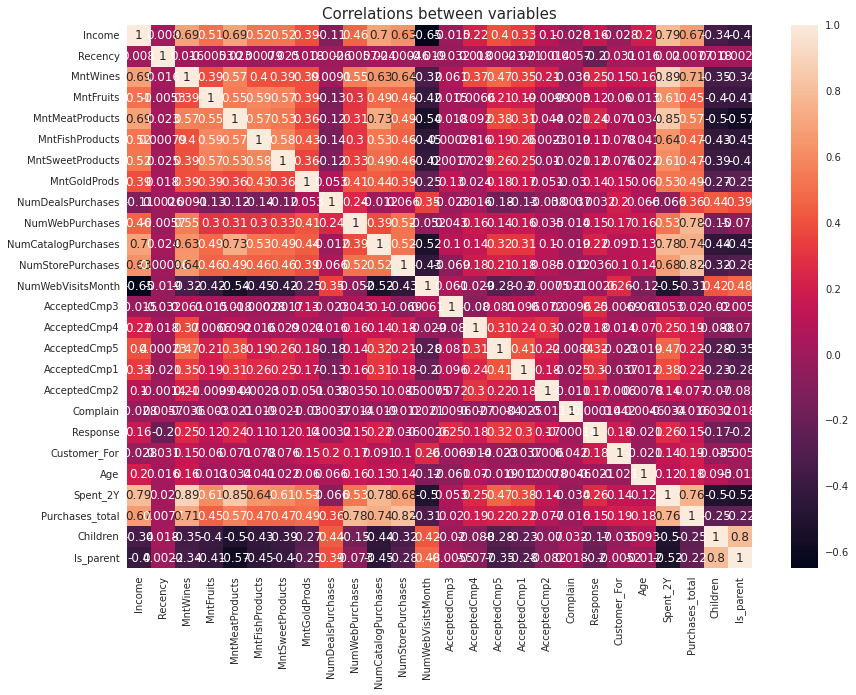

In [30]:
plt.figure(figsize = (14,10))
sns.heatmap(Data.corr(),annot = True)
plt.title("Correlations between variables", size = 15)
plt.show()

# Featuer Transformation

in this section we will be
1. encoding categorical variables
2. scaling the variables which is very important for cluster analysis

In [31]:
Data_copy = Data.copy()
Data_copy.drop(['Spent_2Y', 'Purchases_total','Is_parent'], axis=1, inplace = True)
catego_features = ['Marital_Status','Education']
Encoder = LabelEncoder()
for i in catego_features:
    Data_copy[i] = Data_copy[[i]].apply(Encoder.fit_transform)

from sklearn.preprocessing import MinMaxScaler
# now scaling 
# scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(Data_copy)
scaled_Data_copy = pd.DataFrame(scaler.transform(Data_copy), columns = Data_copy.columns)

In [32]:
#check data
scaled_Data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2212 entries, 0 to 2211
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2212 non-null   float64
 1   Marital_Status       2212 non-null   float64
 2   Income               2212 non-null   float64
 3   Recency              2212 non-null   float64
 4   MntWines             2212 non-null   float64
 5   MntFruits            2212 non-null   float64
 6   MntMeatProducts      2212 non-null   float64
 7   MntFishProducts      2212 non-null   float64
 8   MntSweetProducts     2212 non-null   float64
 9   MntGoldProds         2212 non-null   float64
 10  NumDealsPurchases    2212 non-null   float64
 11  NumWebPurchases      2212 non-null   float64
 12  NumCatalogPurchases  2212 non-null   float64
 13  NumStorePurchases    2212 non-null   float64
 14  NumWebVisitsMonth    2212 non-null   float64
 15  AcceptedCmp3         2212 non-null   f

In [33]:
scaled_Data_copy.head()

,Education,Marital_Status,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Children
0,0.5,0.0,0.351086,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.913452,0.696429,0.000000
1,0.5,0.0,0.277680,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117592,0.750000,0.666667
2,0.5,1.0,0.434956,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.444026,0.553571,0.000000
3,0.5,1.0,0.155079,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.061148,0.214286,0.333333
4,1.0,1.0,0.352051,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.301976,0.267857,0.333333


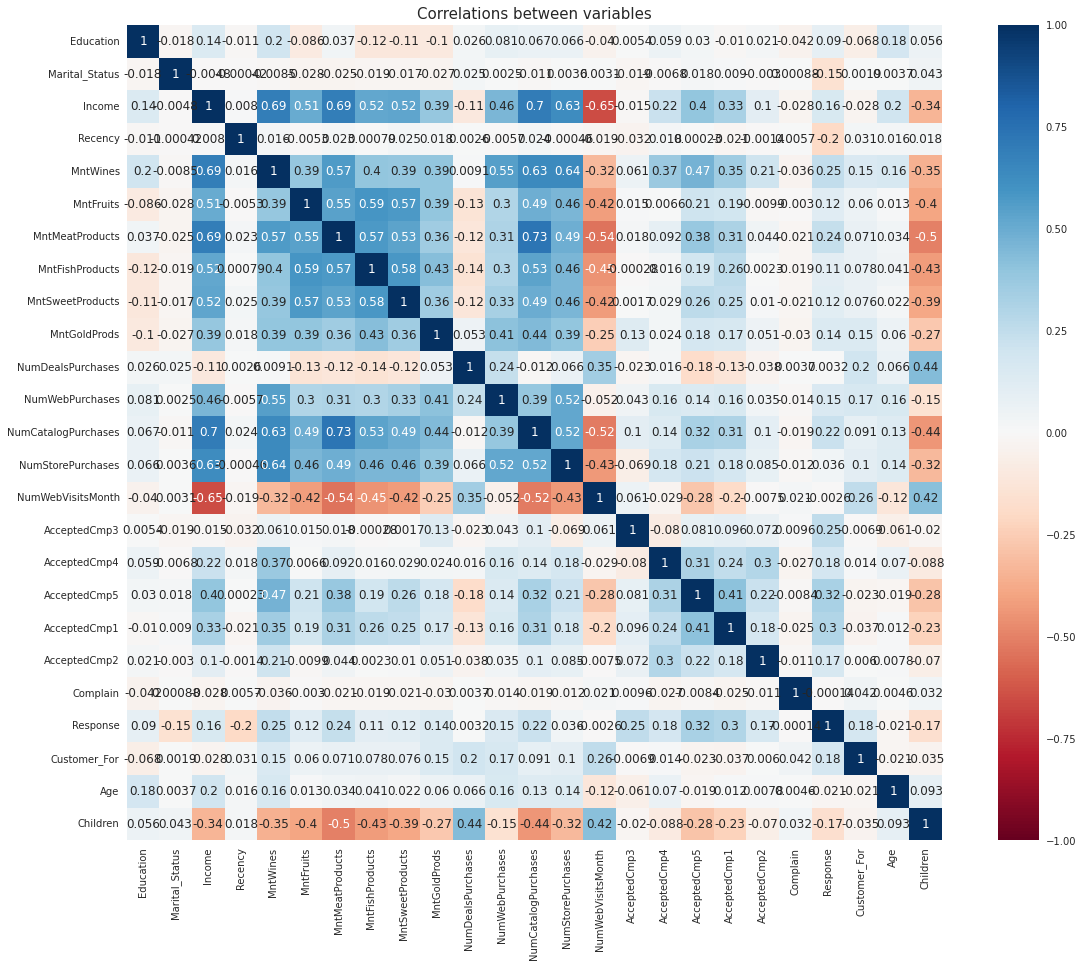

In [34]:
plt.figure(figsize = (20,15))
sns.heatmap(scaled_Data_copy.corr(),annot = True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title("Correlations between variables", size = 15)
plt.show()

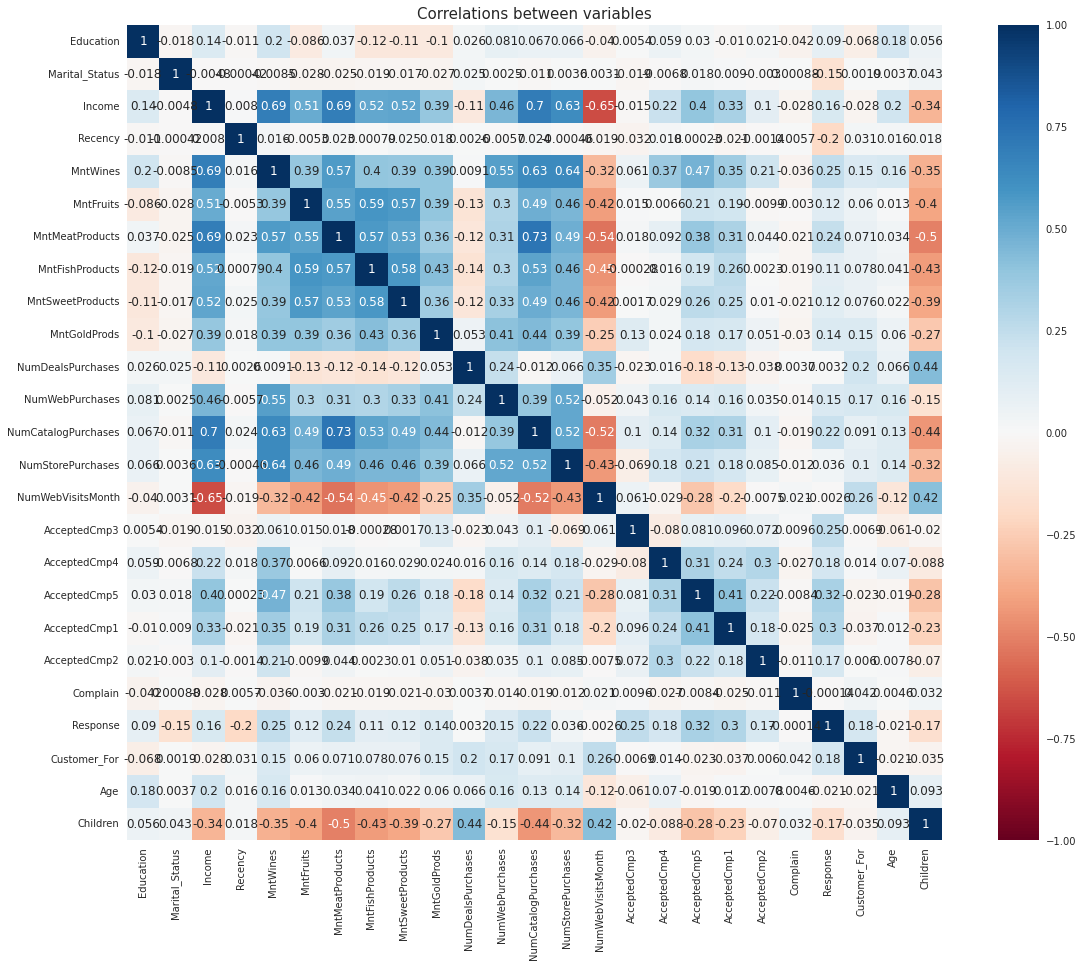

In [35]:
plt.figure(figsize = (20,15))
sns.heatmap(scaled_Data_copy.corr(),annot = True,square=True,
            cmap='RdBu',
            vmax=1,
            vmin=-1)
plt.title("Correlations between variables", size = 15)
plt.show()

# Apply K means Before Dimension Reduction

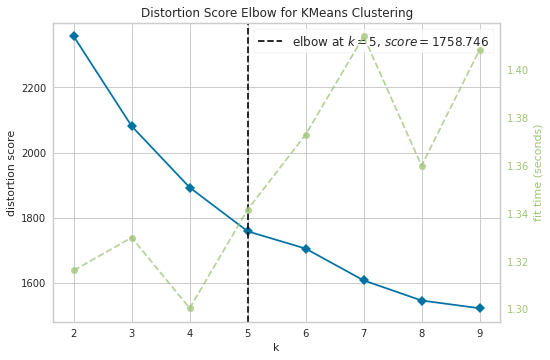

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(scaled_Data_copy)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [37]:
kmeans = KMeans(5)
km = kmeans.fit(scaled_Data_copy)
KM_Labels = km.labels_
# K_cluster = kmeans.fit_predict(scaled_Data_copy)
print(f'K means clustring Silhouette Score with 5 cluster is  {silhouette_score(scaled_Data_copy,KM_Labels)}')

K means clustring Silhouette Score with 5 cluster is  0.191857713364059


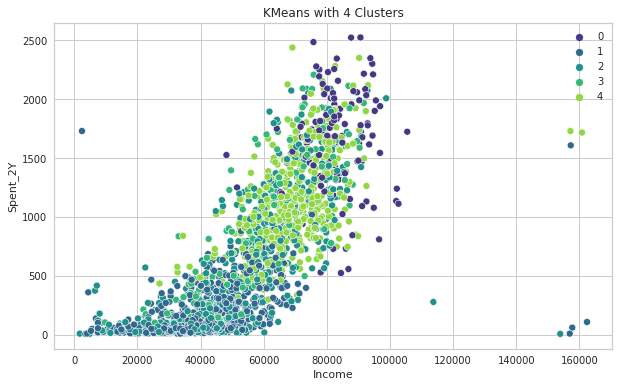

In [38]:
# Checking the distribution of each clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(Data['Income'], Data['Spent_2Y'], hue=KM_Labels, 
                palette=sns.color_palette('viridis', 5))
plt.title('KMeans with 4 Clusters')
plt.show()

In [39]:
# total_var = pca.explained_variance_ratio_.sum() * 100
# fig = px.scatter_3d(X_pca, x="col1", y="col2", z="col3", color=predictions, title=f"Total Explained Variance: {total_var:.2f}%")
# fig.show()

# Apply PCA 

In [40]:
pca = PCA()
pca.fit(scaled_Data_copy)
pca.explained_variance_ratio_

array([0.19873518, 0.17435767, 0.10406788, 0.07398515, 0.0642579 ,
       0.05763555, 0.05010393, 0.04257598, 0.03507665, 0.03035936,
       0.02853312, 0.02648475, 0.02099452, 0.01411473, 0.01282414,
       0.01156138, 0.00951044, 0.00928232, 0.00875123, 0.00770373,
       0.00681772, 0.0041437 , 0.00371583, 0.0022773 , 0.00212982])

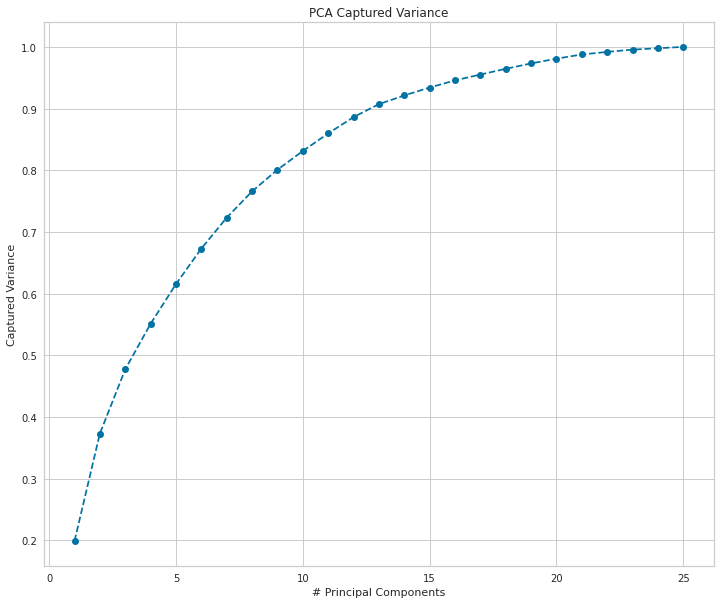

In [41]:
plt.figure(figsize=(12,10))
plt.plot(range(1, 26), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--', )
plt.title('PCA Captured Variance')
plt.xlabel('# Principal Components')
plt.ylabel('Captured Variance')
plt.show()

In [42]:
for i in range(2,21):
  pca = PCA(n_components = i)
  pca.fit(scaled_Data_copy)
  PCA_Data = pd.DataFrame(pca.transform(scaled_Data_copy))
  kmeans = KMeans(6)
  kmeans.fit(PCA_Data)
  identified_clusters = kmeans.fit_predict(PCA_Data)
  print(f'K means clustring Silhouette Score with 6 cluster is  {silhouette_score(PCA_Data,identified_clusters)}')

K means clustring Silhouette Score with 6 cluster is  0.6063680656412312
K means clustring Silhouette Score with 6 cluster is  0.5520863310889561
K means clustring Silhouette Score with 6 cluster is  0.4160922554441479
K means clustring Silhouette Score with 6 cluster is  0.34539563302265375
K means clustring Silhouette Score with 6 cluster is  0.3063372866613024
K means clustring Silhouette Score with 6 cluster is  0.2779345366051091
K means clustring Silhouette Score with 6 cluster is  0.25912595343590106
K means clustring Silhouette Score with 6 cluster is  0.24206244652870956
K means clustring Silhouette Score with 6 cluster is  0.23370877598661025
K means clustring Silhouette Score with 6 cluster is  0.2270046864247171
K means clustring Silhouette Score with 6 cluster is  0.2169220966244824
K means clustring Silhouette Score with 6 cluster is  0.20856431502919068
K means clustring Silhouette Score with 6 cluster is  0.20463261214413148
K means clustring Silhouette Score with 6 clu

In [43]:
pca = PCA(n_components = 3)
pca.fit(scaled_Data_copy)
PCA_Data = pd.DataFrame(pca.transform(scaled_Data_copy), columns = (["col_1", "col_2", "col_3"]))
PCA_Data.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2212.0,1.405346e-17,0.507880,-0.808415,-0.434173,-0.080441,0.304992,1.941529
col_2,2212.0,1.043971e-17,0.475712,-0.893798,-0.405694,0.094104,0.328470,1.178010
col_3,2212.0,3.212219e-18,0.367521,-0.945468,-0.236627,-0.031786,0.167084,1.281761


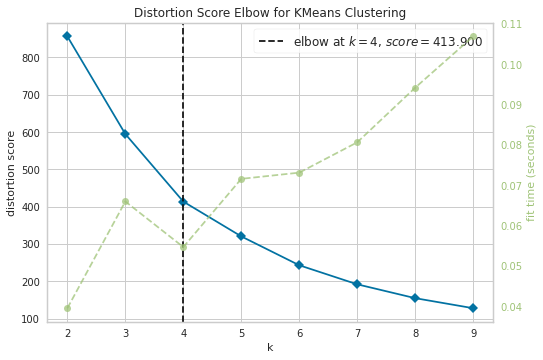

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
# Instantiate the clustering model and visualizer
visualizer = KElbowVisualizer(KMeans(), k=(2,10))
visualizer.fit(PCA_Data)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [45]:
kmeans = KMeans(6)
kmeans.fit(PCA_Data)
identified_clusters = kmeans.fit_predict(PCA_Data)
print(f'K means clustring Silhouette Score with 6 cluster is  {silhouette_score(PCA_Data,identified_clusters)}')

K means clustring Silhouette Score with 6 cluster is  0.5522007853716273


In [46]:
kmeans = KMeans(4)
Km = kmeans.fit(PCA_Data)
KM_Labels_4 = Km.labels_
print(f'K means clustring Silhouette Score with 4 cluster is  {silhouette_score(PCA_Data,KM_Labels_4)}')

K means clustring Silhouette Score with 4 cluster is  0.4982434163954559


Text(0.5, 1.0, 'gaussian mixture clustring with K = 4')

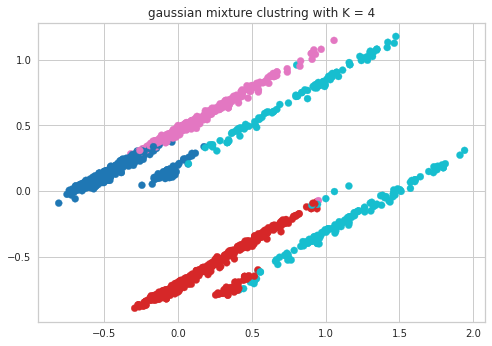

In [47]:
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
plt.scatter(PCA_Data['col_1'], PCA_Data['col_2'], c= KM_Labels_4, cmap = cmap)
plt.title('gaussian mixture clustring with K = 4')

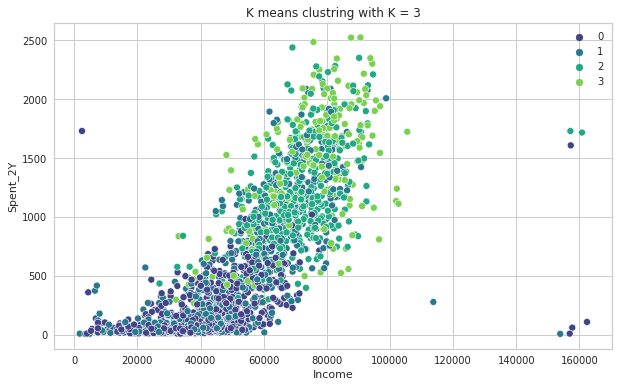

In [48]:
# Checking the distribution of K means clustring on original data
plt.figure(figsize=(10, 6))
sns.scatterplot(Data['Income'], Data['Spent_2Y'], hue=KM_Labels_4, 
                palette=sns.color_palette('viridis', 4))
plt.title('K means clustring with K = 3')
plt.show()

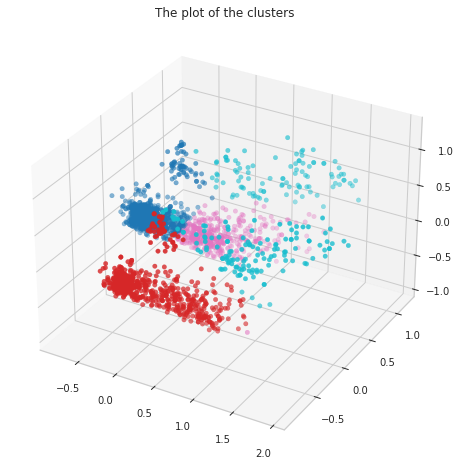

In [49]:
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(PCA_Data['col_1'],PCA_Data['col_2'],PCA_Data['col_3'], c = KM_Labels_4, marker = "o", cmap = cmap)
ax.set_title("The plot of the clusters")
plt.show()

Text(0.5, 0, 'n_components K')

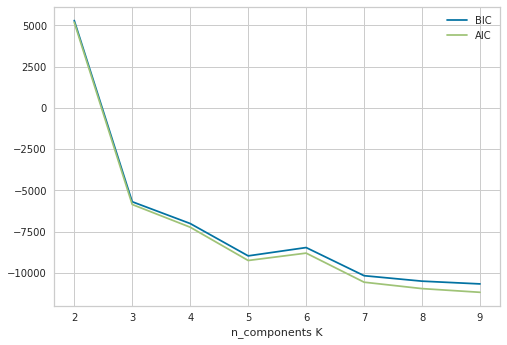

In [50]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(2, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(PCA_Data) for n in n_components]
plt.plot(n_components, [m.bic(PCA_Data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(PCA_Data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components K')

gaussian mixture clustring Silhouette Score with 5 cluster is  0.46030130610610515



Text(0.5, 1.0, 'gaussian mixture clustring with K = 5')

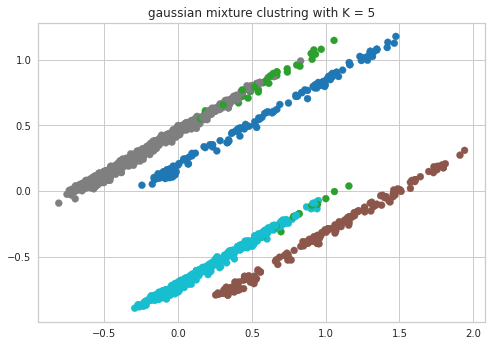

In [51]:
# training gaussian mixture model 

gmm = GaussianMixture(n_components=5)
gmm.fit(PCA_Data)
#predictions from gmm
labels_gmm = gmm.predict(PCA_Data)

print(f'gaussian mixture clustring Silhouette Score with 5 cluster is  {silhouette_score(PCA_Data,labels_gmm)}\n')
plt.scatter(PCA_Data['col_1'], PCA_Data['col_2'], c= labels_gmm, cmap = cmap)
plt.title('gaussian mixture clustring with K = 5')

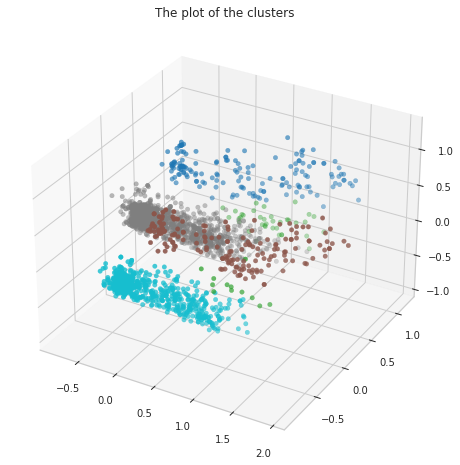

In [52]:
from matplotlib import colors
cmap = colors.ListedColormap(['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection = "3d")
ax.scatter(PCA_Data['col_1'],PCA_Data['col_2'],PCA_Data['col_3'], c = labels_gmm, marker = "o", cmap = cmap)
ax.set_title("The plot of the clusters")
plt.show()

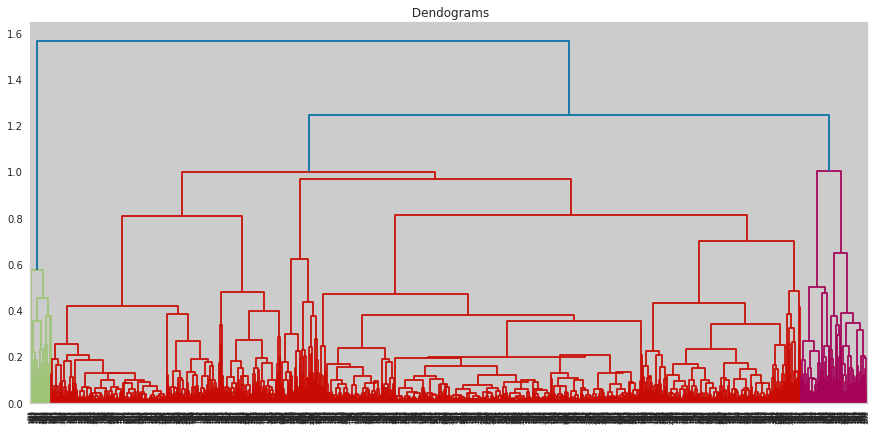

In [53]:
plt.figure(figsize=(15, 7))
plt.title(" Dendograms")
dend = shc.dendrogram(shc.linkage(y= PCA_Data , method='centroid',metric='euclidean'),orientation='top')

Hierarchical Silhouette Score whis 6 cluster is  0.5415955948712113



Text(0.5, 1.0, 'Hierarchical clustring with K = 6')

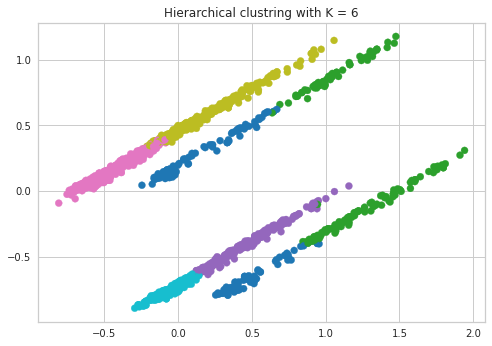

In [54]:
clustering_Hc = AgglomerativeClustering(n_clusters=6).fit(PCA_Data)
labels_hc = clustering_Hc.labels_

print(f'Hierarchical Silhouette Score whis 6 cluster is  {silhouette_score(PCA_Data,labels_hc)}\n')
plt.scatter(PCA_Data['col_1'], PCA_Data['col_2'], c= labels_hc, cmap = cmap)
plt.title('Hierarchical clustring with K = 6')

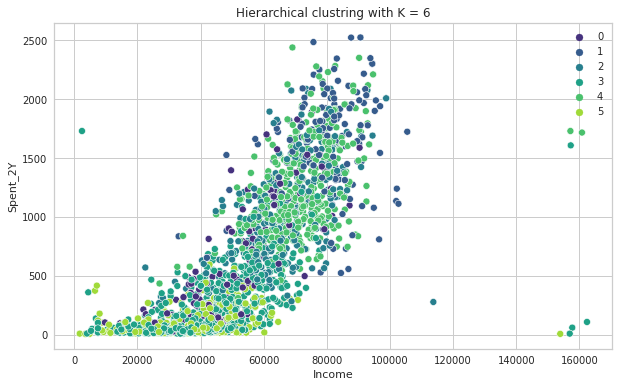

In [55]:
# Checking the distribution of each clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(Data['Income'], Data['Spent_2Y'], hue=labels_hc, 
                palette=sns.color_palette('viridis', 6))
plt.title('Hierarchical clustring with K = 6')
plt.show()

DBSCAN Silhouette Score is  0.455964280133122



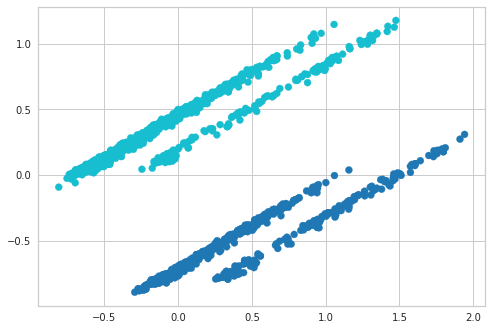

In [56]:
clustering2 = DBSCAN(eps=.8, min_samples = 10).fit(PCA_Data)
DBSCAN_labels = clustering2.labels_

print(f'DBSCAN Silhouette Score is  {silhouette_score(PCA_Data,DBSCAN_labels)}\n')
plt.scatter(PCA_Data['col_1'], PCA_Data['col_2'], c= DBSCAN_labels, cmap = cmap)

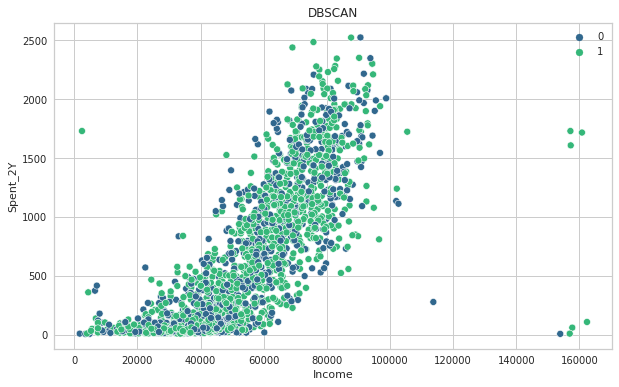

In [57]:
# Checking the distribution of DBSCAN clustring on original Dataset
plt.figure(figsize=(10, 6))
sns.scatterplot(Data['Income'], Data['Spent_2Y'], hue=DBSCAN_labels, 
                palette=sns.color_palette('viridis', 2))
plt.title('DBSCAN')
plt.show()

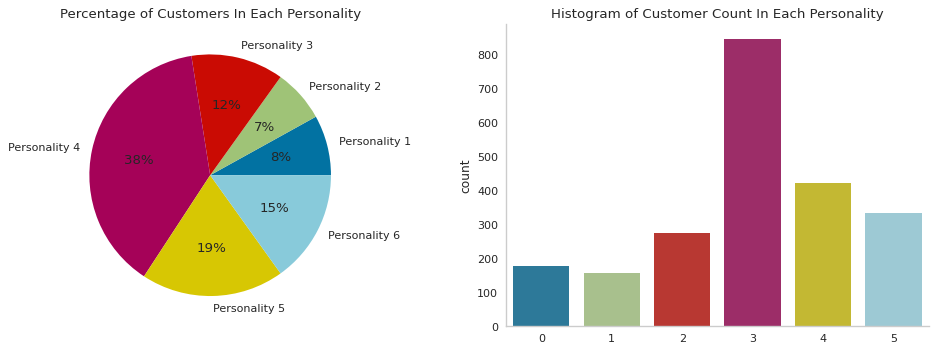

In [58]:
#define labels
labels = [ 'Personality 1', 'Personality 2', 'Personality 3','Personality 4','Personality 5','Personality 6']
counts= []

#compute counts
for i in range(6):
  counts.append(len(scaled_Data_copy[labels_hc==i]))

plt.figure(figsize=(15, 5), dpi=80)
plt.rcParams.update({'axes.grid': False})

#pie plot
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.set_title("Percentage of Customers In Each Personality")
plt.pie(counts, labels = labels, autopct='%.0f%%')

#bar plot
ax1 = plt.subplot2grid((1,2), (0, 1))
ax1.set_title("Histogram of Customer Count In Each Personality")
sns.countplot(x=labels_hc, alpha=.9, ax=ax1)
sns.despine()

plt.show()